In [3]:
!pip install plotly
!pip install matplotlib
!pip install seaborn
!pip install numpy
!pip install scikit-learn
!pip install imblearn

   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/258.3 kB 660.6 kB/s eta 0:00:01
   ---------------------------------------- 258.3/258.3 kB 3.2 MB/s eta 0:00:00


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_squared_error

In [5]:
df = pd.read_csv("F1DriversDataset.csv")
df

,Driver,Nationality,Seasons,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,...,Championship Years,Decade,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active,Champion
0,Carlo Abate,Italy,"[1962, 1963]",0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,NaN,1960,0.0,0.000000,0.0,0.0,0.000000,0.000000,2,False
1,George Abecassis,United Kingdom,"[1951, 1952]",0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,NaN,1950,0.0,1.000000,0.0,0.0,0.000000,0.000000,2,False
2,Kenny Acheson,United Kingdom,"[1983, 1985]",0.0,10.0,3.0,0.0,0.0,0.0,0.0,...,NaN,1980,0.0,0.300000,0.0,0.0,0.000000,0.000000,2,False
3,Andrea de Adamich,Italy,"[1968, 1970, 1971, 1972, 1973]",0.0,36.0,30.0,0.0,0.0,0.0,0.0,...,NaN,1970,0.0,0.833333,0.0,0.0,0.000000,0.166667,5,False
4,Philippe Adams,Belgium,[1994],0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,NaN,1990,0.0,1.000000,0.0,0.0,0.000000,0.000000,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,Emilio Zapico,Spain,[1976],0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,1980,0.0,0.000000,0.0,0.0,0.000000,0.000000,1,False
864,Zhou Guanyu,China,[2022],0.0,23.0,23.0,0.0,0.0,0.0,2.0,...,NaN,2020,0.0,1.000000,0.0,0.0,0.086957,0.260870,1,False
865,Ricardo Zonta,Brazil,"[1999, 2000, 2001, 2004, 2005]",0.0,37.0,36.0,0.0,0.0,0.0,0.0,...,NaN,2000,0.0,0.972973,0.0,0.0,0.000000,0.081081,5,False
866,Renzo Zorzi,Italy,"[1975, 1976, 1977]",0.0,7.0,7.0,0.0,0.0,0.0,0.0,...,NaN,1980,0.0,1.000000,0.0,0.0,0.000000,0.142857,3,False


In [6]:
df.head()

,Driver,Nationality,Seasons,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,...,Championship Years,Decade,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active,Champion
0,Carlo Abate,Italy,"[1962, 1963]",0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,NaN,1960,0.0,0.000000,0.0,0.0,0.0,0.000000,2,False
1,George Abecassis,United Kingdom,"[1951, 1952]",0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,NaN,1950,0.0,1.000000,0.0,0.0,0.0,0.000000,2,False
2,Kenny Acheson,United Kingdom,"[1983, 1985]",0.0,10.0,3.0,0.0,0.0,0.0,0.0,...,NaN,1980,0.0,0.300000,0.0,0.0,0.0,0.000000,2,False
3,Andrea de Adamich,Italy,"[1968, 1970, 1971, 1972, 1973]",0.0,36.0,30.0,0.0,0.0,0.0,0.0,...,NaN,1970,0.0,0.833333,0.0,0.0,0.0,0.166667,5,False
4,Philippe Adams,Belgium,[1994],0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,NaN,1990,0.0,1.000000,0.0,0.0,0.0,0.000000,1,False


In [7]:
df.columns

Index(['Driver', 'Nationality', 'Seasons', 'Championships', 'Race_Entries',
       'Race_Starts', 'Pole_Positions', 'Race_Wins', 'Podiums', 'Fastest_Laps',
       'Points', 'Active', 'Championship Years', 'Decade', 'Pole_Rate',
       'Start_Rate', 'Win_Rate', 'Podium_Rate', 'FastLap_Rate',
       'Points_Per_Entry', 'Years_Active', 'Champion'],
      dtype='object')

# Q1: How does the number of seasons a driver compete in relate to their total race wins?

In [8]:
df_winsvsyears = df[['Years_Active','Race_Wins']]
df_winsvsyears.head()

,Years_Active,Race_Wins
0,2,0.0
1,2,0.0
2,2,0.0
3,5,0.0
4,1,0.0


In [9]:
df_winsvsyears.isnull().sum()

Years_Active    0
Race_Wins       0
dtype: int64

In [10]:
X= df_winsvsyears['Years_Active'].to_numpy().reshape(-1,1)
y = df_winsvsyears['Race_Wins'].to_numpy().reshape(-1,1).ravel()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=200, max_depth=None)

rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

In [12]:
corr_coef = df['Years_Active'].corr(df['Race_Wins'])
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("corr coef",corr_coef)

Mean Squared Error:  22.30995205155708
corr coef 0.5037167768266376


In [13]:
# Primary Question 1: How does the number of seasons a driver competes in relate to their total race wins?
corr_seasons_wins = df['Years_Active'].corr(df['Race_Wins'])

Text(0, 0.5, 'Number of Wins')

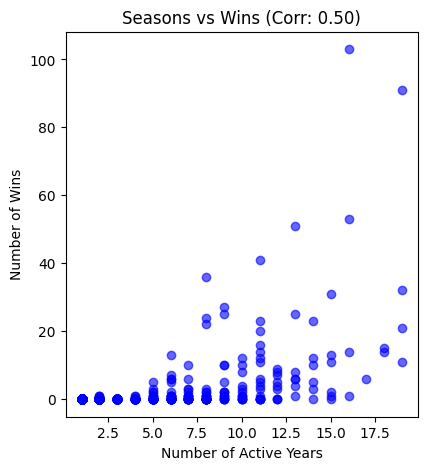

In [15]:
plt.figure(figsize=(10, 5))

# Plot 1: Correlation between Seasons and Wins
plt.subplot(1, 2, 1)
plt.scatter(df['Years_Active'], df['Race_Wins'], alpha=0.6, color='blue')
plt.title(f"Seasons vs Wins (Corr: {corr_seasons_wins:.2f})")
plt.xlabel('Number of Active Years')
plt.ylabel('Number of Wins')

There most likely are other factors involved other than the number of years of experience contributing to a driver's success in Formula 1.

The correlation coefficient is 0.50, indicating a moderate positive correlation. Drivers who participate in more seasons tend to have more race wins.

# Q2: How is the number of championships won compare to the number of seasons competed in? 

In [16]:
df_champsvsyears = df[['Years_Active','Championships']]
df_champsvsyears.head()

,Years_Active,Championships
0,2,0.0
1,2,0.0
2,2,0.0
3,5,0.0
4,1,0.0


In [17]:
df_champsvsyears.isnull().sum()

Years_Active     0
Championships    0
dtype: int64

In [18]:
corr_seasons_championships = df['Years_Active'].corr(df['Championships'])
print(f"Correlation between Seasons and Championships: {corr_seasons_championships:.2f}")

Correlation between Seasons and Championships: 0.42


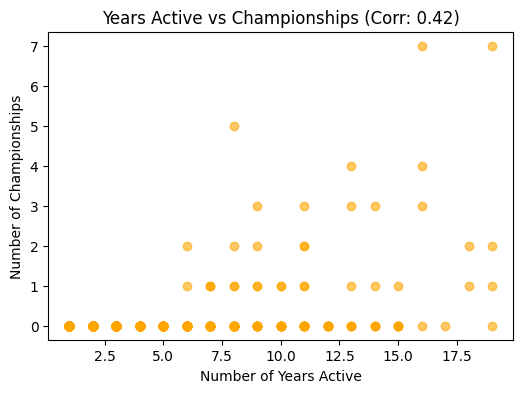

In [19]:
# Scatter plot for Seasons vs Championships
plt.figure(figsize=(6, 4))
plt.scatter(df['Years_Active'], df['Championships'], alpha=0.6, color='orange')
plt.title(f"Years Active vs Championships (Corr: {corr_seasons_championships:.2f})")
plt.xlabel('Number of Years Active')
plt.ylabel('Number of Championships')
plt.show()

The correlation is 0.42, indicating a moderate relationship between the number of seasons a driver participates in and their championships won.

# Q3: Does the decade a driver participates in affect their average win rate relative to their number of race starts?

This is an interesting question as it considers historical changes in Formula 1, such as improvements in car technology, team dominance, or driver strategies. It asks whether drivers from different decades have been more or less successful in terms of converting race starts into wins.

In [20]:
decade_group = df.groupby('Decade').agg({
    'Win_Rate': 'mean',
    'Race_Starts': 'mean'
}).reset_index()

In [21]:
decade_group['Win_Rate_Per_Start'] = decade_group['Win_Rate'] / decade_group['Race_Starts']
print(decade_group)

   Decade  Win_Rate  Race_Starts  Win_Rate_Per_Start
0    1950  0.013459     4.743455            0.002837
1    1960  0.007078     8.631356            0.000820
2    1970  0.009794    21.029412            0.000466
3    1980  0.010657    34.213115            0.000311
4    1990  0.009494    47.277108            0.000201
5    2000  0.018616    75.340000            0.000247
6    2010  0.019746    89.723404            0.000220
7    2020  0.010932    77.540541            0.000141


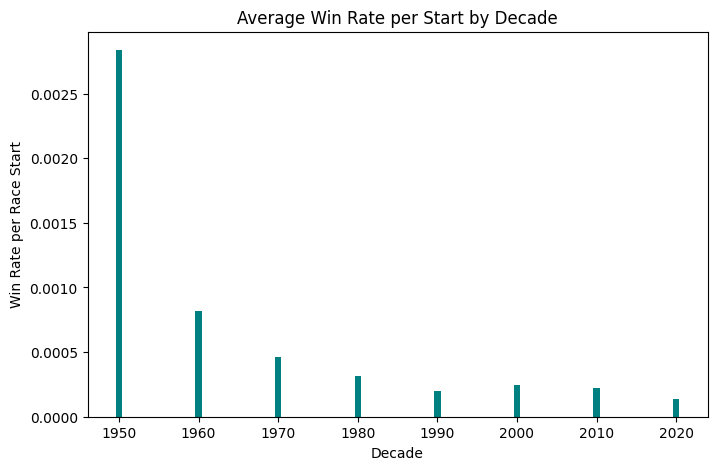

In [22]:
plt.figure(figsize=(8, 5))
plt.bar(decade_group['Decade'], decade_group['Win_Rate_Per_Start'], color='teal')
plt.title('Average Win Rate per Start by Decade')
plt.xlabel('Decade')
plt.ylabel('Win Rate per Race Start')
plt.xticks(decade_group['Decade'])  # Ensure all decades are labeled
plt.show()

# Q4: How is the number of podium finishes relate to the number of pole positions for drivers who have been champions?

In [23]:
df_champions = df.query('Championships > 0')
df_champions.head()

,Driver,Nationality,Seasons,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,...,Championship Years,Decade,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active,Champion
17,Fernando Alonso,Spain,"[2001, 2003, 2004, 2005, 2006, 2007, 2008, 200...",2.0,359.0,356.0,22.0,32.0,99.0,23.0,...,"[2005, 2006]",2010,0.061281,0.991643,0.089136,0.275766,0.064067,5.782730,19,True
25,Mario Andretti,United States,"[1968, 1969, 1970, 1971, 1972, 1974, 1975, 197...",1.0,131.0,128.0,18.0,12.0,19.0,10.0,...,[1978],1980,0.137405,0.977099,0.091603,0.145038,0.076336,1.374046,14,True
35,Alberto Ascari,Italy,"[1950, 1951, 1952, 1953, 1954, 1955]",2.0,33.0,32.0,14.0,13.0,17.0,12.0,...,"[1952, 1953]",1950,0.424242,0.969697,0.393939,0.515152,0.363636,3.261818,6,True
107,Jack Brabham,Australia,"[1955, 1956, 1957, 1958, 1959, 1960, 1961, 196...",3.0,128.0,126.0,13.0,14.0,31.0,12.0,...,"[1959, 1960, 1966]",1960,0.101562,0.984375,0.109375,0.242188,0.093750,1.976562,16,True
135,Jenson Button,United Kingdom,"[2000, 2001, 2002, 2003, 2004, 2005, 2006, 200...",1.0,309.0,306.0,8.0,15.0,50.0,8.0,...,[2009],2010,0.025890,0.990291,0.048544,0.161812,0.025890,3.996764,18,True


In [24]:
df_champions.isnull().sum()

Driver                0
Nationality           0
Seasons               0
Championships         0
Race_Entries          0
Race_Starts           0
Pole_Positions        0
Race_Wins             0
Podiums               0
Fastest_Laps          0
Points                0
Active                0
Championship Years    0
Decade                0
Pole_Rate             0
Start_Rate            0
Win_Rate              0
Podium_Rate           0
FastLap_Rate          0
Points_Per_Entry      0
Years_Active          0
Champion              0
dtype: int64

In [25]:
from sklearn.metrics import mean_squared_error
def linear_regression(df, predictor, target):
    
    # to fit a linear regression model to the data
    X = df[predictor].values.reshape(-1,1)
    y = df[target].values.reshape(-1,1)
    
    regressor = LinearRegression()
    regressor.fit(X, y)
    
    # Calculate the R-squared value of the linear regression model
    r_squared = regressor.score(X, y)
    
    # Calculate the correlation coefficient 
    corr_coef = df[predictor].corr(df[target])
    
    # Predict the target variable using the predictor variable
    y_pred = regressor.predict(X)
    
    # Calculate the prediction score
    prediction_score = mean_squared_error(y, y_pred)
    
    # Create a scatter plot to visualize the relationship between the predictor and target
    fig = sns.lmplot(x=predictor,y=target,data=df)
    
    # Plot the regression line on top of the scatter plot
    plt.plot(df[predictor], regressor.predict(df[[predictor]]), color='red')
    plt.title('Race Wins vs Pole Positions')
    return corr_coef, r_squared, y_pred, prediction_score, fig

prediction_score 68.33930367927572
correlation coefficient 0.9280326627611925
R-squared: 0.8612446231516298


C:\Users\monti\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


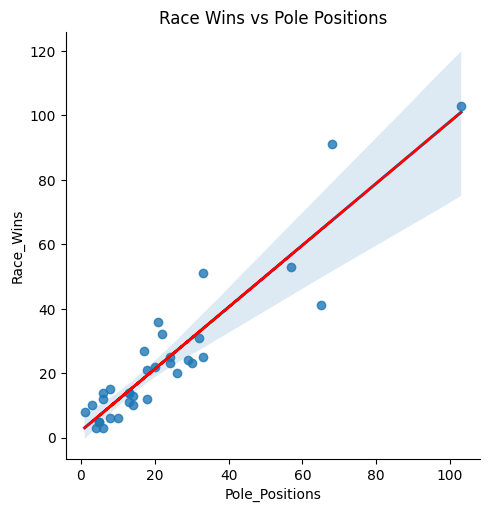

In [26]:
corr_coef, r_squared, y_pred, prediction_score, fig = linear_regression(df_champions, 'Pole_Positions', 'Race_Wins')


print('prediction_score', prediction_score)
print('correlation coefficient', corr_coef)
print('R-squared:', r_squared)

Securing pole position is a strong indicator of race victories for champions, with higher pole positions typically correlating with a greater number of wins.

# Q5: Can we predict if a driver will become a champion based on their race statistics?

## Plan:
Target Variable: Champion (binary classification: 1 for champion, 0 for non-champion).
### Features:
- Pole_Rate: Percentage of races where the driver started on pole.
- Start_Rate: Percentage of races the driver finished.
- Win_Rate: Percentage of races won.
- Podium_Rate: Percentage of podium finishes.
- FastLap_Rate: Percentage of races where the driver achieved the fastest lap.
- Years_Active: Number of years the driver was active.

I will implement the following: Oversampling the minority class using the SMOTE (Synthetic Minority Over-sampling Technique) method, and Trying a Random Forest classifier as it tends to perform well in classification tasks and can handle class imbalance better than Logistic Regression (tried before and proved fualty).

In [27]:
X = df[['Pole_Rate', 'Start_Rate', 'Win_Rate', 'Podium_Rate', 'FastLap_Rate', 'Years_Active']]
y = df['Champion']  # Target: Whether the driver became a champion or not

In [28]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [30]:
# Initialize a Random Forest classifier
model = RandomForestClassifier(random_state=42)

In [31]:
# Train the model
model.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [32]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [33]:
# Evaluate the model using a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

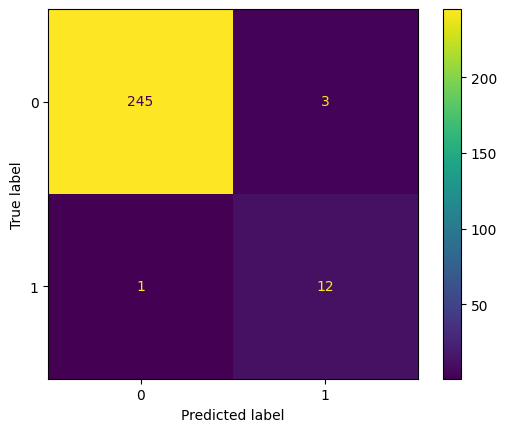

In [34]:
# Display the confusion matrix
ConfusionMatrixDisplay(conf_matrix).plot()

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      0.99      0.99       248
        True       0.80      0.92      0.86        13

    accuracy                           0.98       261
   macro avg       0.90      0.96      0.92       261
weighted avg       0.99      0.98      0.99       261



# Confusion Matrix: 
The confusion matrix will show the performance of the model:
- True Positives (TP): Correctly predicted champions.
- True Negatives (TN): Correctly predicted non-champions.
- False Positives (FP): Incorrectly predicted champions (non-champions predicted as champions).
- False Negatives (FN): Incorrectly predicted non-champions (champions predicted as non-champions).

# Classification Report Metrics:

- Precision: The proportion of drivers predicted as champions who actually became champions. High precision means fewer false positives.
- Recall (Sensitivity): The proportion of actual champions who were correctly predicted as champions. High recall means fewer false negatives.
- F1-Score: The harmonic mean of precision and recall. This is a balanced measure of a model's performance.
- Accuracy: The overall percentage of correctly predicted champions and non-champions.


Based on the evaluation metrics obtained from the Random Forest classifier and the analysis of the confusion matrix, the model demonstrates a strong ability to predict whether a driver can become a champion using the features Pole_Rate, Start_Rate, Win_Rate, Podium_Rate, FastLap_Rate, and Years_Active.
However, while the results are promising, we must acknowledge the inherent unpredictability of Formula 1 racing. Factors such as team strategies, mechanical failures, and external conditions can significantly influence race outcomes, making it challenging to predict championship success with complete certainty.

Consequently, although the model has shown impressive performance, it is essential to view these results as part of a broader analysis. Further exploration of additional features, more complex modeling techniques, or ensemble methods could enhance predictive capabilities.
In conclusion, while the Random Forest classifier demonstrates a robust prediction of championship potential among drivers, it should be considered as one tool among many in understanding the complexities of success in Formula 1 racing.